In [35]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
import mglearn
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签 
plt.rcParams['axes.unicode_minus']=False

In [3]:
# matplotlib的交互式功能
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

# 颜色编码

红色系列：

火焰红：`#e25822`
珊瑚红：`#ff6f61`
镉红：`#e60012`
大红：`#ff0000`

蓝色系列：

湖蓝：`#4285f4`
天蓝：`#00a1f1`
宝蓝：`#005cbf`
钢蓝：`#4682b4`

绿色系列：

橄榄绿：`#3d9970`
橙绿：`#ff9933`
酸橙绿：`#aaff00`
深绿：`#006400`

黄色和橙色系列：

金黄：`#ffd700`
土豆黄：`#ffd700`
珊瑚黄：`#ffcc00`
胡萝卜橙：`#ed9121`

紫色和粉红色系列：

紫罗兰：`#8a2be2`
玫瑰红：`#ff007f`
粉红：`#ff69b4`
藕色：`#b4a8bd`

灰色系列：

银灰：`#c0c0c0`
钢灰：`#808080`
烟灰：`#a2a2a2`
暗灰：`#696969`

# 示例一

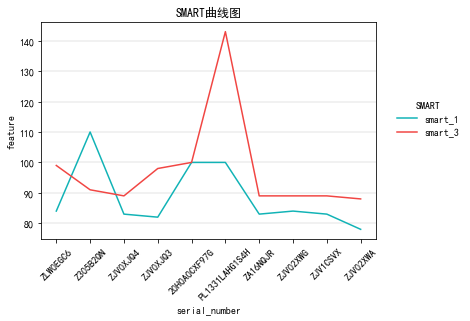

In [4]:
#绘制折线图1
plt.plot(X,y1,label = 'smart_1',linestyle='-',color = '#11b3b6')
plt.plot(X,y2,label = 'smart_3',linestyle='-',color = '#f14643')
plt.xlabel('serial_number')
plt.ylabel('feature')
plt.legend(bbox_to_anchor=(1.05, 0.45), loc=3, borderaxespad=0, frameon=False, title = 'SMART')#绘制图例
my_x_ticks = np.arange(0,len(X),1)#设置横坐标间隔为1
plt.xticks(my_x_ticks, rotation = 45)#横轴按角度显示
plt.title('SMART曲线图')
plt.grid(axis = 'y',linewidth=0.35)#绘制网格

# 示例二

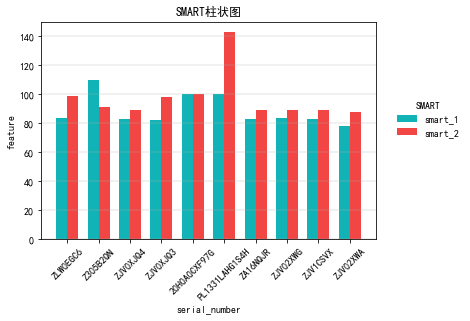

In [5]:
#绘制直方图
fig, ax = plt.subplots()
ind = np.arange(len(X))+1#设置柱状图个数及位置
width = 0.35#柱状图宽度
rects1 = ax.bar(ind-width/2, y1, width, color='#11b3b6', label='smart_1')
rects2 = ax.bar(ind+width/2, y2, width, color='#f14643', label='smart_2')#X1加减的值为width的二分之一
ax.set_xlabel('serial_number')
ax.set_ylabel('feature')
ax.set_title('SMART柱状图')
ax.legend(bbox_to_anchor=(1.05, 0.45), loc=3, borderaxespad=0, frameon=False, title = 'SMART')#绘制图例
plt.xticks(ind,X,rotation = 45)#横轴按角度显示
plt.grid(axis = 'y',linewidth=0.35)#绘制网格
plt.show()

# 示例三

Text(40M0A05FF97G, 110, '40M0A05FF97G')

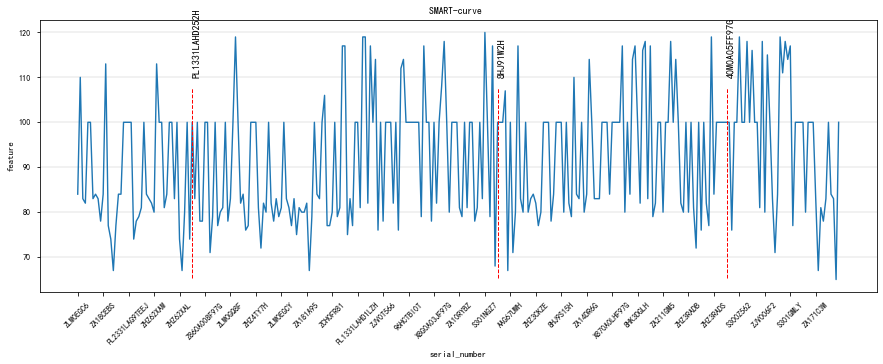

In [23]:
#绘制折线图2
X1 = data['serial_number'][:300]
y11 = data['smart_1_normalized'][:300]
fig = plt.figure(1, (15, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(X1,y11,label = 'smart_3',linestyle='-')
plt.xlabel('serial_number')
plt.ylabel('feature')
my_x_ticks = np.arange(0,len(X1),10)#设置横坐标间隔为10
plt.xticks(my_x_ticks, rotation = 45)#rotation文字旋转方向
plt.title('SMART-curve ')#图标题
plt.grid(axis = 'y',linewidth=0.35)#绘制网格
plt.style.use('seaborn-paper')#绘制背景色
plt.axvline(data['serial_number'][45],color = 'red',linestyle = '--',lw = 1,ymin = 0.05,ymax = 0.75)#设置参考线
plt.annotate(data['serial_number'][45],xy = (data['serial_number'][45],110),rotation = 90) # 添加注释，xy为文本放置位置，分别为横纵坐标
plt.axvline(data['serial_number'][165],color = 'red',linestyle = '--',lw = 1,ymin = 0.05,ymax = 0.75)
plt.annotate(data['serial_number'][165],xy = (data['serial_number'][165],110),rotation = 90)
plt.axvline(data['serial_number'][255],color = 'red',linestyle = '--',lw = 1,ymin = 0.05,ymax = 0.75)
plt.annotate(data['serial_number'][255],xy = (data['serial_number'][255],110),rotation = 90)

# 示例四

Text(0.5, 1.0, 'SMART-curve ')

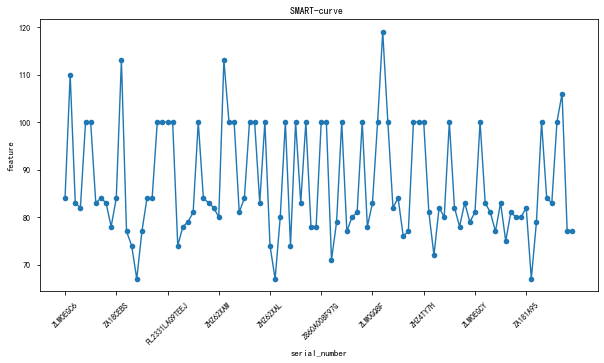

In [20]:
#绘制折线图3
X2 = data['serial_number'][:100]
y12 = data['smart_1_normalized'][:100]
fig = plt.figure(1, (10, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(X2,y12,'o',linestyle='-')#设置线型
plt.xlabel('serial_number')
plt.ylabel('feature')
my_x_ticks = np.arange(0,len(X2),10)#设置横坐标间隔为10
plt.xticks(my_x_ticks, rotation = 45)#rotation文字旋转方向
plt.title('SMART-curve ')#图标题

# 示例五

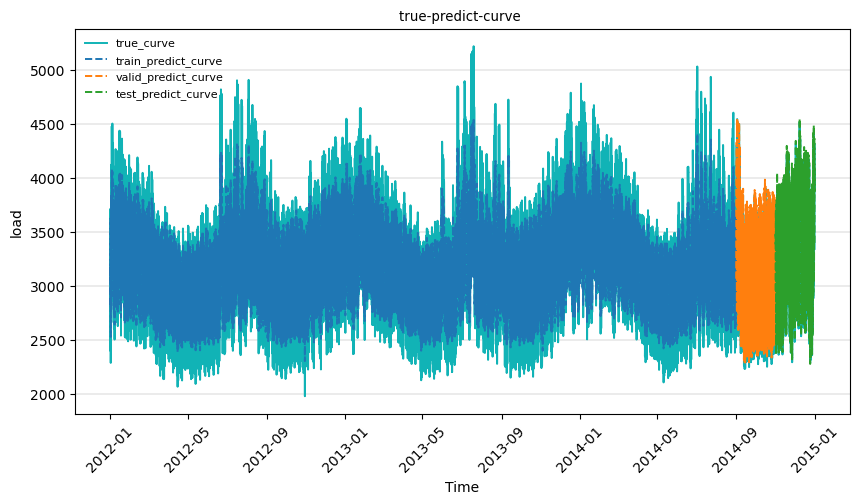

In [4]:
#绘图，原始图，训练图，验证图，测试图
fig = plt.figure(1, (10, 5))
ax = fig.add_subplot(1,1,1)
plt.style.use('seaborn-v0_8-paper') #绘制背景色
plt.grid(axis = 'y',linewidth=0.35) #绘制网格
plt.title('true-predict-curve ') #图标题
plt.xticks(rotation = 45) #rotation文字旋转方向
ax.plot(timeseries_x, timeseries_y, linestyle='-',color = '#11b3b6',label = 'true_curve')
ax.plot(train_plot_x, train_plot_y, linestyle='--',label = 'train_predict_curve')
ax.plot(valid_plot_x, valid_plot_y, linestyle='--',label = 'valid_predict_curve')
ax.plot(test_plot_x, test_plot_y, linestyle='--',label = 'test_predict_curve')
ax.legend(frameon=False) #绘制图例
plt.xlabel('Time')
plt.ylabel(y_true.columns.values[0])
plt.show()

# 示例六

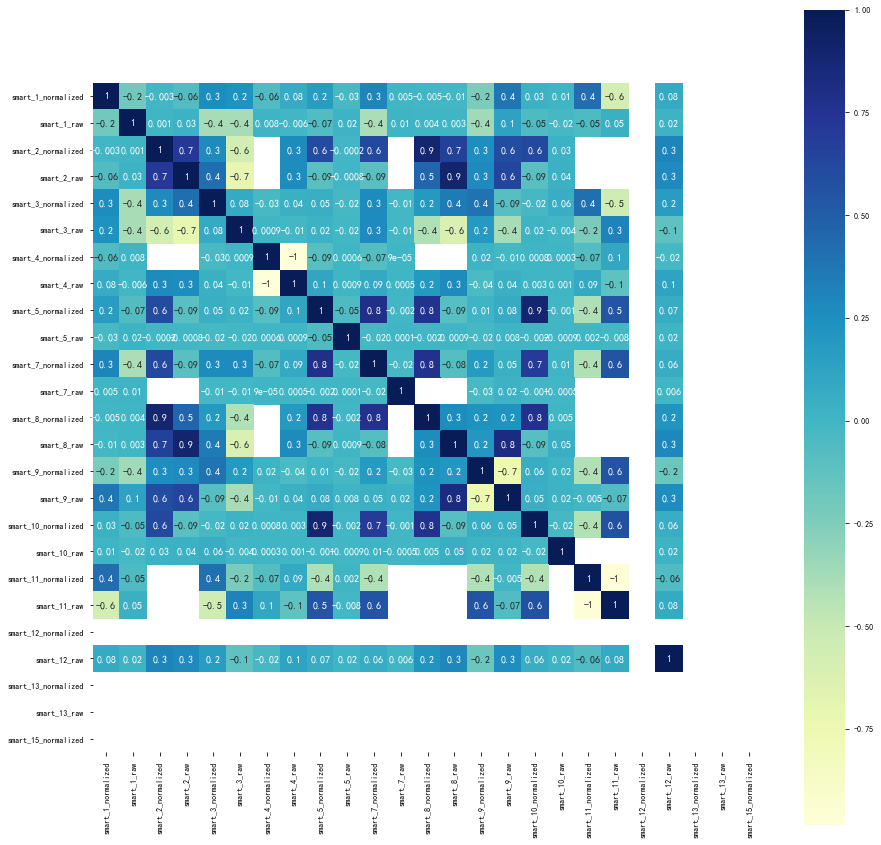

In [91]:
#绘制相关系数矩阵与热力图
a = data.iloc[:,5:30].corr()
plt.subplots(figsize=(15, 15))
sns.heatmap(a , vmax=1, square=True,center=0,cmap="YlGnBu",annot=True,fmt='.1g')
plt.show()

# 示例十

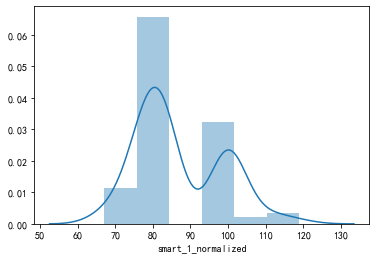

In [10]:
#单属性直方图
sns.distplot(tips['smart_1_normalized'])

# 示例十一

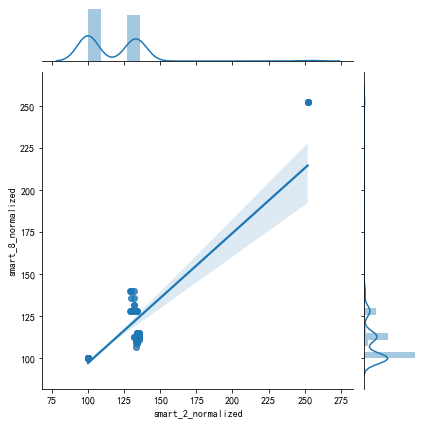

In [16]:
#两两属性的相关性图
tips = data.iloc[:1000,5:]
sns.jointplot(x = 'smart_2_normalized', y = 'smart_8_normalized', data = tips,kind = 'reg')

# 示例十二

([<matplotlib.axis.XTick at 0x2b033891208>,
 <a list of 10 Text xticklabel objects>)

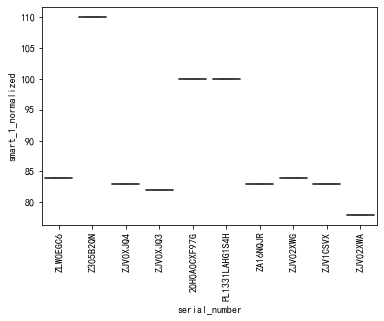

In [21]:
#箱线图
tips = data.iloc[:10,:]
sns.boxplot(x = 'serial_number', y= 'smart_1_normalized', data = tips)
my_x_ticks = np.arange(0,len(tips))#设置横坐标间隔为10
plt.xticks(my_x_ticks, rotation = 90)#rotation文字旋转方向

# 示例十三

用figure()函数画两张图

如果想画两张图则必须使用plt.figure()两次，可以指定num，也可以不指定num，调用两次它会默认加1。

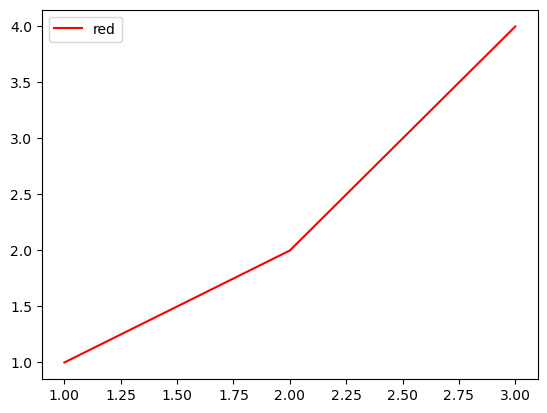

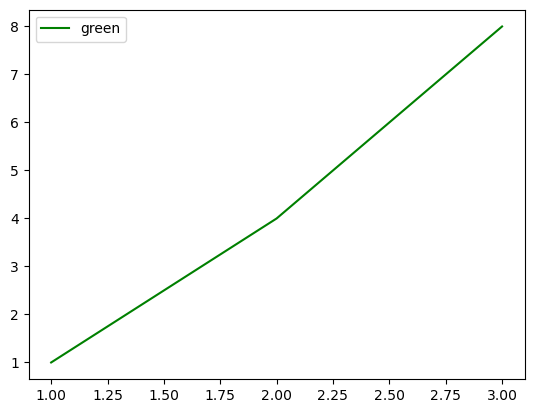

In [2]:
x=[1,2,3]
y1=[1,2,4]
y2=[1,4,8]
 
plt.figure()
plt.plot(x,y1,color = "red",label = "red")
plt.legend()  #无此语句会不显示右下角label
 
plt.figure()
plt.plot(x,y2,color = "green",label = "green")
plt.legend()  #无此语句会不显示右上角label
plt.show()

# 示例十四

Text(0, 0.5, '数值')

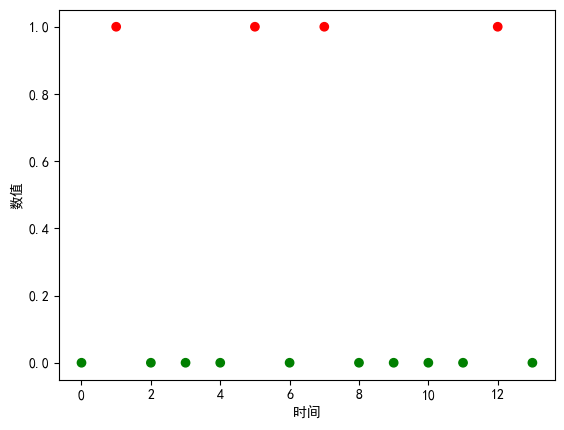

In [8]:
# 原始数据
y = [0,1,0,0,0,1,0,1,0,0,0,0,1,0]
x = range(len(y))

# 循环为标签赋颜色编码
c = []
for i in y:
    if i == 0:
        c.append('green')
    elif i == 1:
        c.append('red')
        
# 绘制不同颜色的散点图
plt.scatter(x=x, y=y, c=c)
plt.xlabel('时间')
plt.ylabel('数值')

Text(0, 0.5, '数值')

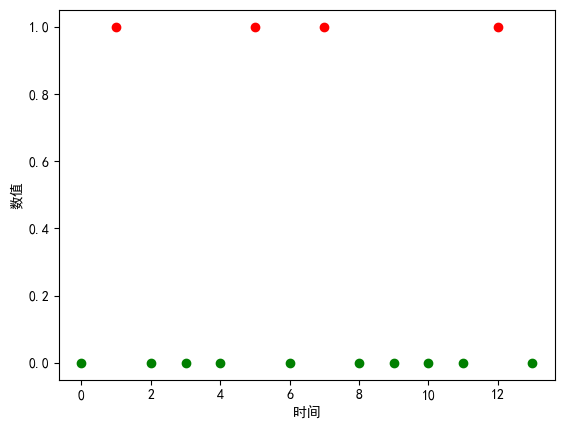

In [9]:
# 原始数据
y = [0,1,0,0,0,1,0,1,0,0,0,0,1,0]
x = range(len(y))

x1 = []
y1 = []
x2 = []
y2 = []

for i in range(len(y)):
    if y[i] == 1:
        x1.append(i)
        y1.append(y[i])
    elif y[i] == 0:
        x2.append(i)
        y2.append(y[i])
        
# 绘制不同颜色的散点图
plt.scatter(x=x1, y=y1, c='red')
plt.scatter(x=x2, y=y2, c='green')
plt.xlabel('时间')
plt.ylabel('数值')

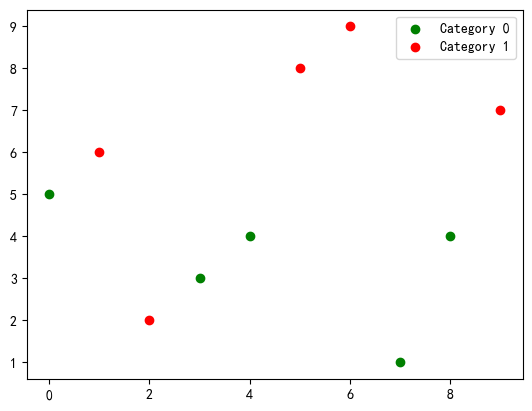

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x2 = np.array([5, 6, 2, 3, 4, 8, 9, 1, 4, 7])
y = np.array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1])
y_nums = list(set(y))

# 循环为标签赋颜色编码
c = []
for i in y_nums:
    if i == 0:
        c.append('green')
    elif i == 1:
        c.append('red')

fig, ax = plt.subplots()

for i in y_nums:
    ax.scatter(x1[y == i], x2[y == i], c=c[i], label='Category '+str(i))

ax.legend()
plt.show()

# 示例十五

In [27]:
data = pd.read_csv('../data/energy1.csv')

In [28]:
data['time'] = pd.to_datetime(data['time'])

Text(2012-01-02 18:00:00, 4180, '实际报警点')

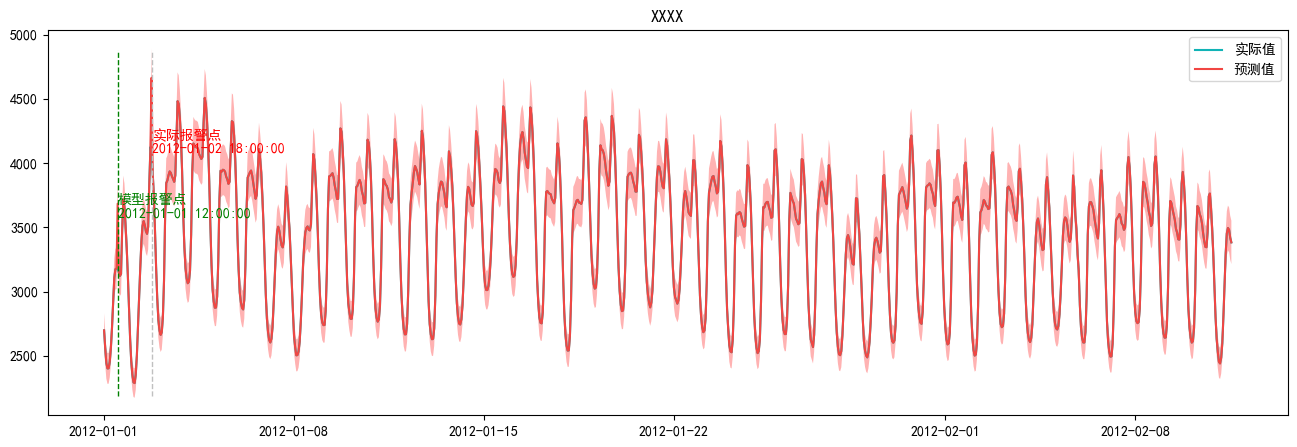

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# 设置上下限阈值，预测值5%-10%之间
threshold = 0.05
time = pd.to_datetime(data['time'])
true = data['实际值'].astype("float")
predict = data['预测值'].astype("float")
plt.figure(figsize=(16, 5))
plt.plot(time, true, linestyle='-', color = '#11b3b6')
plt.plot(time, predict, linestyle='-', color = '#f14643')
plt.legend(["实际值", "预测值"])
plt.title("XXXX")

# 绘制预测阈值带（安全范围的区间）
plt.fill_between(time,
                 predict - predict * threshold,
                 predict + predict * threshold,
                 facecolor='red',
                 alpha=0.3)

#设置预警参考线
outliner_data = data[(true > predict + predict * threshold) |
                     (true < predict - predict * threshold)]
first_time = outliner_data.reset_index(drop=True)['time'][0]
plt.axvline(first_time,
            color='green',
            linestyle='--',
            lw=1,
            ymin=0.05,
            ymax=0.95)
plt.annotate(first_time, xy=(first_time, 3580), rotation=0,
             color='green')  # 添加注释，xy为文本放置位置，分别为横纵坐标
plt.annotate('模型报警点', xy=(first_time, 3680), rotation=0, color='green')  # 添加描述

# 实际报警点
point = '2012-01-02 18:00:00'
point_time = pd.to_datetime(point)
plt.axvline(point_time,
            color='#c0c0c0',
            linestyle='--',
            lw=1,
            ymin=0.05,
            ymax=0.95)
plt.annotate(point_time, xy=(point_time, 4080), rotation=0, color='red')
plt.annotate('实际报警点', xy=(point_time, 4180), rotation=0, color='red')

# 示例十六

In [36]:
data = pd.read_csv('../data/energy1.csv')
data['time'] = pd.to_datetime(data['time'])

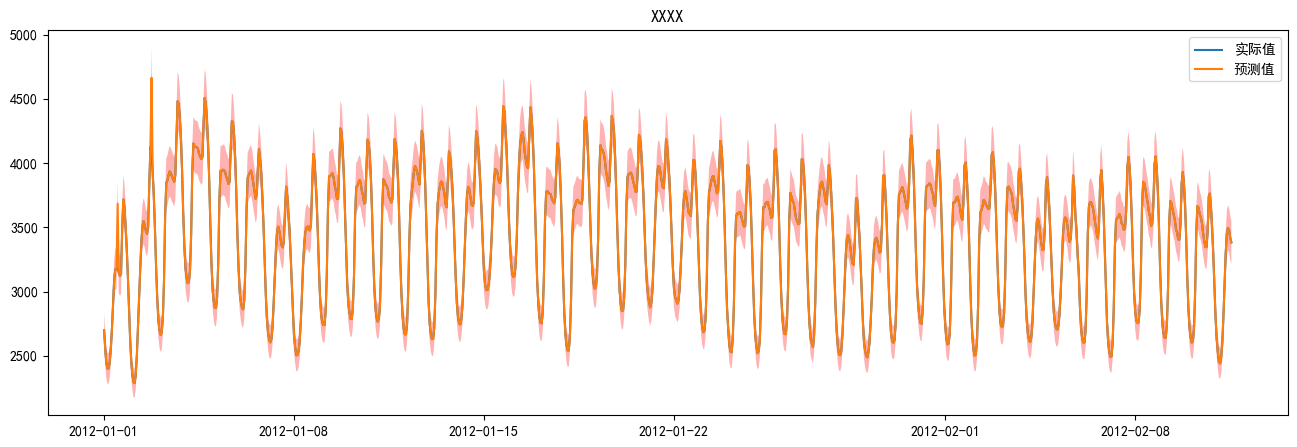

In [40]:
import matplotlib.pyplot as plt

# 设置上下限阈值，预测值5%-10%之间
threshold = 0.05
time = data['time']
true = data['实际值'].astype("float")
predict = data['预测值'].astype("float")
plt.figure(figsize=(16, 5))
plt.plot(time, true)
plt.plot(time, predict)
plt.legend(["实际值", "预测值"])
plt.title("XXXX")

# 绘制预测阈值带（安全范围的区间）
plt.fill_between(time,
                 predict - predict * threshold,
                 predict + predict * threshold,
                 facecolor='red',
                 alpha=0.3)